In [1]:
cd /home/jovyan/Housing_pricing

/home/jovyan/Housing_pricing


In [2]:
% run __init__.py

In [3]:
% matplotlib inline

## 1. Load Data 

In [4]:
csv = 'data/train.csv'
df_housing = pd.read_csv(csv)
df_housing.set_index('Id')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Exploratory Analysis 
### Check DataTypes

In [5]:
df_housing.shape

(1460, 81)

In [6]:
df_housing.info()  #a great way to see which features have non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Fill the nan values/missing values.

In [7]:
df_housing.isnull().sum() #find which features have null_values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
# making a mask with all the features that have null values
cols_w_nulls = [col for i, col in enumerate(df_housing.columns) 
             if df_housing.isnull().sum()[i] != 0]

In [9]:
df_housing[cols_w_nulls].isnull().sum().sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

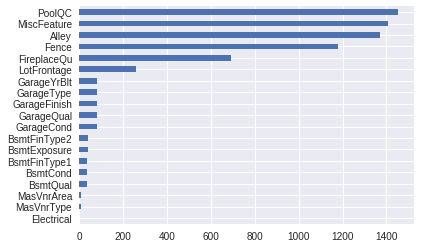

In [10]:
#displaying all the columns with null values
df_housing[cols_w_nulls].isnull().sum().sort_values(ascending = True).plot(kind = 'barh')

## Drop columns with too many missing features
- anything with over 1400 missing values will be dropped

In [11]:
df_housing.drop(labels = ['PoolQC', 'MiscFeature', 'Alley'] , axis = 1, inplace = True)

In [12]:
cols_w_nulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
#columns with values are 16

cols_w_nulls.remove('Alley')
cols_w_nulls.remove('PoolQC')
cols_w_nulls.remove('MiscFeature')
cols_w_nulls # without Alley, PoolQC, and MiscFeature 

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

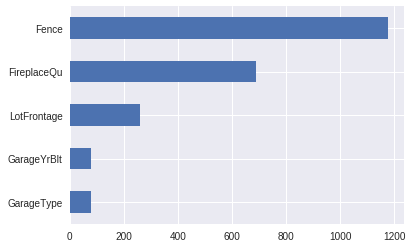

In [14]:
df_housing[cols_w_nulls].isnull().sum().nlargest(5).sort_values(ascending = True).plot(kind = 'barh')

## Tackling the biggest problem first : Fence
    - Fence: Fence quality (catagorical data)
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       

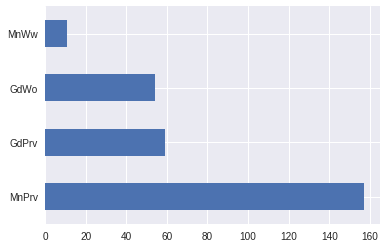

In [15]:
from sklearn.neighbors import KNeighborsClassifier
df_housing['Fence'].value_counts().plot(kind = 'barh')

In [16]:
df_housing['Fence'].isnull().sum() # this is the number of null values in the fence feature

1179

## Create a canonical list of fence qualities

In [17]:
fences = df_housing['Fence'].unique().tolist()
fences #list of all catagories

[nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']

In [18]:
columns = list(set(df_housing.columns) - set(cols_w_nulls)) #these will be our predictive features
dummied = pd.get_dummies(df_housing[columns])

In [19]:
dummied.isnull().sum().sum()

0

In [20]:
## Convert to numeric index, preserving our nulls
dummied['Fence'] = df_housing['Fence'].map(lambda x: fences.index(x) if type(x) != float else x)

In [21]:
only_predictors = list(set(dummied.columns) - set(["Fence"])) #only predictive feature (281 features)

y         = dummied[dummied['Fence'].notnull()]['Fence']
X         = dummied[dummied['Fence'].notnull()][only_predictors]
to_impute = dummied.loc[df_housing['Fence'].isnull()][only_predictors] #indexed by row all rows that have null values, 
                                                                        # and all the columns that are predictors

In [22]:
#verify shape, no nulls in target, and no inifinite values in training target
y.shape, y.isnull().sum(), np.isinf(y).sum()

((281,), 0, 0)

In [23]:
#there are still null values in the training matrix
X.shape, X.isnull().sum().sum(), np.isinf(X).sum().sum()

((281, 217), 0, 0)

## Basic KNN Model
The only thing we're not exploring is the possibility for cross-validation. This is also a great idea. You could split your data for validation if you use the known set of rows containing non-null "occupation" values.

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
model = knn.fit(X, y)

In [25]:
## Should always make sure your dimensions match up for training vs predicting (and/or testing)
# Most of this code I wrote to be boilerplate
X.shape, to_impute.shape

((281, 217), (1179, 217))

#### `to_impute` is our slice of "null" occupations.
We add our predictions back to our original DataFrame, using the predict function.

In [26]:
to_impute['predicted_fence'] = model.predict(to_impute)

In [27]:
to_impute['predicted_labels'] = to_impute['predicted_fence'].map(lambda p: fences[int(p)])

### We can add our labels back from or occupation reference list

In [28]:
to_impute[['predicted_fence', 'predicted_labels']].head()

,predicted_fence,predicted_labels
0,1.0,MnPrv
1,1.0,MnPrv
2,3.0,GdPrv
3,3.0,GdPrv
4,1.0,MnPrv


### Let's impute our original DataFrame!

In [29]:
## Notice the missing occupations line up perfectly!
df_housing.loc[to_impute.index].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [30]:
df_housing.loc[to_impute.index, 'Fence'] = to_impute['predicted_labels']

In [31]:
df_housing.Fence.isnull().sum() # verified it worked!

0

## Imputing Fireplace Quality 

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [32]:
df_housing['FireplaceQu'].isnull().sum()

690

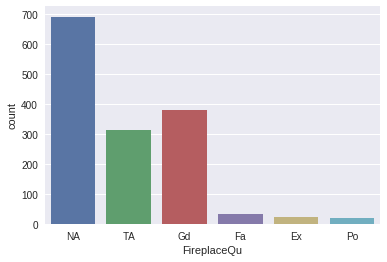

In [33]:
df_housing['FireplaceQu'] = df_housing['FireplaceQu'].fillna('NA')
sns.countplot(df_housing['FireplaceQu'])

## Imputing 'LotFrontage' with KNN Regressor
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

In [34]:
df_housing['LotFrontage'].isnull().sum()

259

In [35]:
columns = list(set(df_housing.columns) - set(cols_w_nulls)) #these will be our predictive features
columns.append("LotFrontage")
dummied = pd.get_dummies(df_housing[columns])

In [36]:
only_predictors = list(set(dummied.columns) - set(['LotFrontage']))
y =         dummied[dummied['LotFrontage'].notnull()]['LotFrontage']
X =         dummied[dummied['LotFrontage'].notnull()][only_predictors]
to_impute = dummied.loc[dummied['LotFrontage'].isnull()][only_predictors]

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights="distance")
model = knn.fit(X, y)

In [38]:
to_impute['predicted_LotFrontage'] = model.predict(to_impute)

In [39]:
df_housing.loc[to_impute.index, 'LotFrontage'] = to_impute['predicted_LotFrontage']

df_housing.LotFrontage.isnull().sum()

0

## Imputing Garage Year Built
- these are not continuous values
- they are catagorical

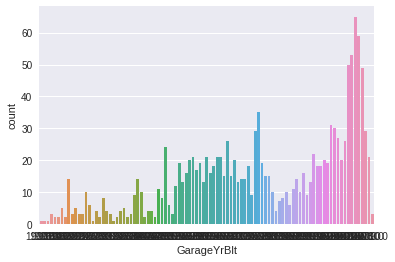

In [40]:
sns.countplot(df_housing['GarageYrBlt'])

In [41]:
df_housing['GarageYrBlt'].isnull().sum()

81

In [42]:
garage_years = df_housing['GarageYrBlt'].astype('object').unique().tolist() #unique list of year catagories

columns = list(set(df_housing.columns) - set(cols_w_nulls)) #these will be our predictive features
columns.append("GarageYrBlt")
dummied = pd.get_dummies(df_housing[columns])



In [43]:
only_predictors = list(set(dummied.columns) - set(['GarageYrBlt']))
y =         dummied[dummied['GarageYrBlt'].notnull()]['GarageYrBlt']
X =         dummied[dummied['GarageYrBlt'].notnull()][only_predictors]
to_impute = dummied.loc[dummied['GarageYrBlt'].isnull()][only_predictors]

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
model = knn.fit(X, y)

In [45]:
to_impute['predicted_GarageYrBlt'] = model.predict(to_impute)

In [46]:
to_impute.predicted_GarageYrBlt[0:5] #need to encode these a catagorical

39    1953.0
48    1930.0
78    1954.0
88    1956.0
89    1982.0
Name: predicted_GarageYrBlt, dtype: float64

In [47]:
df_housing.loc[to_impute.index, 'GarageYrBlt'] = to_impute['predicted_GarageYrBlt']

In [48]:
df_housing['GarageYrBlt'].isnull().sum()

0

## GarageType: Garage location
      
      2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [49]:
df_housing.GarageType.isnull().sum()

81

In [50]:
df_housing['GarageType'] = df_housing['GarageType'].fillna('NA')

In [51]:
df_housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

## Next features to impute

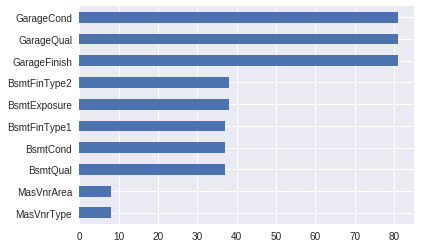

In [52]:
df_housing[cols_w_nulls].isnull().sum().nlargest(10).sort_values(ascending = True).plot(kind = 'barh')

## Imputing GarageCond : Qualitive Catagorical

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [53]:
df_housing.GarageCond.isnull().sum()

81

In [54]:
df_housing.GarageCond = df_housing.GarageCond.fillna('NA')
df_housing.GarageCond.value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

## GarageQual : 

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [55]:
df_housing.GarageQual.isnull().sum()

81

In [56]:
df_housing.GarageQual = df_housing.GarageQual.fillna('NA')
df_housing.GarageQual.value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

## GarageFinish
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [57]:
df_housing.GarageFinish.isnull().sum()

81

In [58]:
df_housing.GarageFinish = df_housing.GarageFinish.fillna('NA')
df_housing.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

## BsmntFinType2
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [59]:
  df_housing.BsmtFinType2.isnull().sum()

38

In [60]:
df_housing.BsmtFinType2 = df_housing.BsmtFinType2.fillna('NA')
df_housing.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

## BsmtExposure

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [61]:
df_housing.BsmtExposure.isnull().sum()

38

In [62]:
df_housing.BsmtExposure = df_housing.BsmtExposure.fillna('NA')
df_housing.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

## BsmtFinType1
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [63]:
df_housing.BsmtFinType1 = df_housing.BsmtFinType1.fillna('NA')
df_housing.BsmtFinType1.isnull().sum()

0

## BsmtCond
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [64]:
df_housing.BsmtCond = df_housing.BsmtCond.fillna('NA')
df_housing.BsmtCond.isnull().sum()

0

## BsmtQual

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [65]:
df_housing.BsmtQual = df_housing.BsmtQual.fillna('NA')
df_housing.BsmtQual.isnull().sum()

0

## MasVnrArea: Masonry veneer area in square feet
    Data is very skewed to the left 
    Continuous numerical data - I will impute with the mode

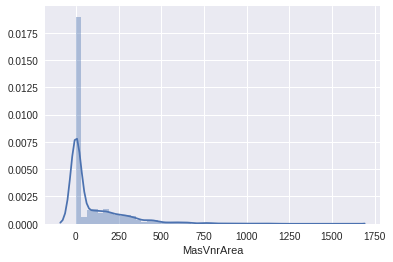

In [66]:
masvnrarea = df_housing[df_housing.MasVnrArea.notnull()]['MasVnrArea']
sns.distplot(masvnrarea)

In [67]:
from scipy import stats
arr = np.array(df_housing.MasVnrArea)
mode = float(stats.mode(arr)[0])
df_housing.MasVnrArea = df_housing.MasVnrArea.fillna(mode)
df_housing.MasVnrArea.isnull().sum()

0

## MasVnrType

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

      1. Decided to impute with the mode since only 

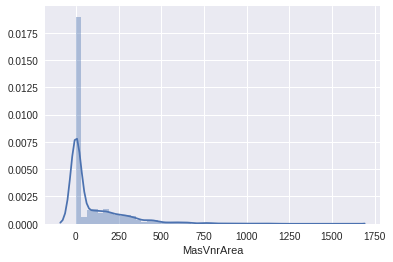

In [68]:
masvnrarea = df_housing[df_housing.MasVnrType.notnull()]['MasVnrArea']
sns.distplot(masvnrarea)

In [69]:
arr = np.array(masvnrarea)
mode = float(stats.mode(arr)[0])
df_housing.MasVnrType = df_housing.MasVnrType.fillna(mode)
df_housing.MasVnrType.isnull().sum()

0

## Electrical
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [70]:
df_housing.Electrical.isnull().sum()

1

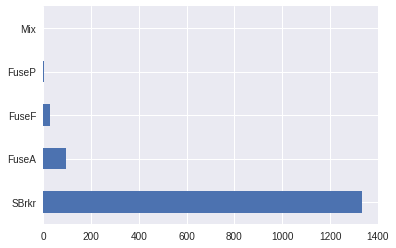

In [71]:
df_housing.Electrical.value_counts().plot(kind = 'barh')

In [72]:
df_housing.Electrical = df_housing.Electrical.fillna('SBrkr')

## Final check to see if all null values have been imputed 

In [75]:
df_housing.isnull().sum().sum()

0